# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [68]:
# conda install -c conda-forge ta-lib

In [69]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [70]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [71]:
start_date = dt.datetime(2018, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'AMD'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2018-03-01,12.26,12.27,11.66,11.90,11.90,63207400
2018-03-02,11.67,11.93,11.43,11.81,11.81,58123500
2018-03-05,11.69,12.06,11.61,11.91,11.91,43734800
2018-03-06,12.01,12.05,11.71,11.76,11.76,46751200
2018-03-07,11.58,12.82,11.55,12.24,12.24,127603200
...,...,...,...,...,...,...
2023-02-22,76.93,78.13,75.92,76.61,76.61,50286800
2023-02-23,80.63,81.79,77.97,79.75,79.75,76391300
2023-02-24,77.75,78.81,76.94,78.09,78.09,46700000
2023-02-27,79.64,80.12,78.53,78.77,78.77,45617300


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2018-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8+ KB


In [73]:
data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Open,1258.00000,63.01002,35.87353,9.08000,29.34250,63.38500,88.03500,163.28000
High,1258.00000,64.31660,36.61303,9.77000,29.77000,64.29000,89.85500,164.46001
Low,1258.00000,61.63148,35.03491,9.04000,28.70250,62.11000,86.17250,156.10001
Close,1258.00000,62.99456,35.82387,9.53000,29.19250,63.17500,87.89750,161.91000
Adj Close,1258.00000,62.99456,35.82387,9.53000,29.19250,63.17500,87.89750,161.91000
Volume,1258.00000,70883867.48808,35394049.51260,16705900.00000,45166975.00000,61227250.00000,87065050.00000,325058400.00000


#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [74]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,30MA,50MA,200MA,EMA_0.3
2023-02-22,76.93,78.13,75.92,76.61,76.61,50286800,77.58,72.85,78.85,79.13
2023-02-23,80.63,81.79,77.97,79.75,79.75,76391300,77.97,73.07,78.78,79.31
2023-02-24,77.75,78.81,76.94,78.09,78.09,46700000,78.27,73.22,78.73,78.95
2023-02-27,79.64,80.12,78.53,78.77,78.77,45617300,78.53,73.36,78.68,78.89
2023-02-28,77.87,80.14,77.42,78.58,78.58,44220100,78.79,73.56,78.64,78.80


In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

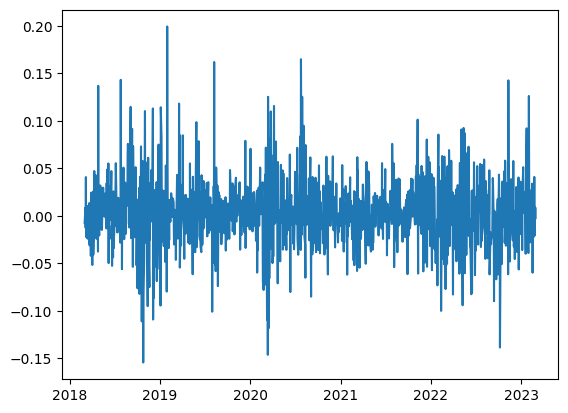

In [76]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

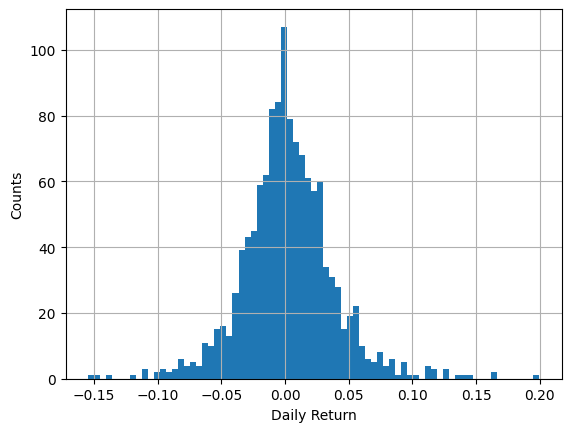

In [77]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [78]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

,Close
2018-03-31,11.26
2018-04-30,10.08
2018-05-31,12.44
2018-06-30,15.62
2018-07-31,16.75
2018-08-31,21.05
2018-09-30,30.83
2018-10-31,24.71
2018-11-30,20.40
2018-12-31,19.24


In [79]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

,Close,Year,Month,dayofweek,quarter
2018-03-31,11.26,2018,March,Saturday,1
2018-04-30,10.08,2018,April,Monday,2
2018-05-31,12.44,2018,May,Thursday,2
2018-06-30,15.62,2018,June,Saturday,2
2018-07-31,16.75,2018,July,Tuesday,3
2018-08-31,21.05,2018,August,Friday,3
2018-09-30,30.83,2018,September,Sunday,3
2018-10-31,24.71,2018,October,Wednesday,4
2018-11-30,20.40,2018,November,Friday,4
2018-12-31,19.24,2018,December,Monday,4


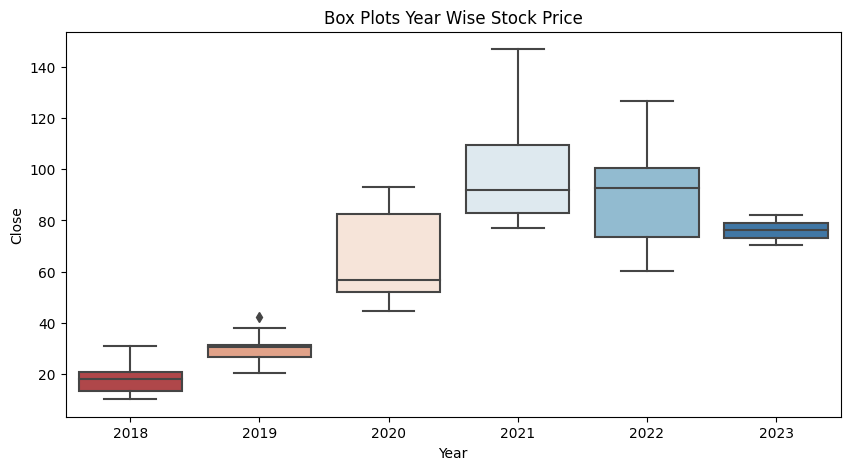

In [80]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

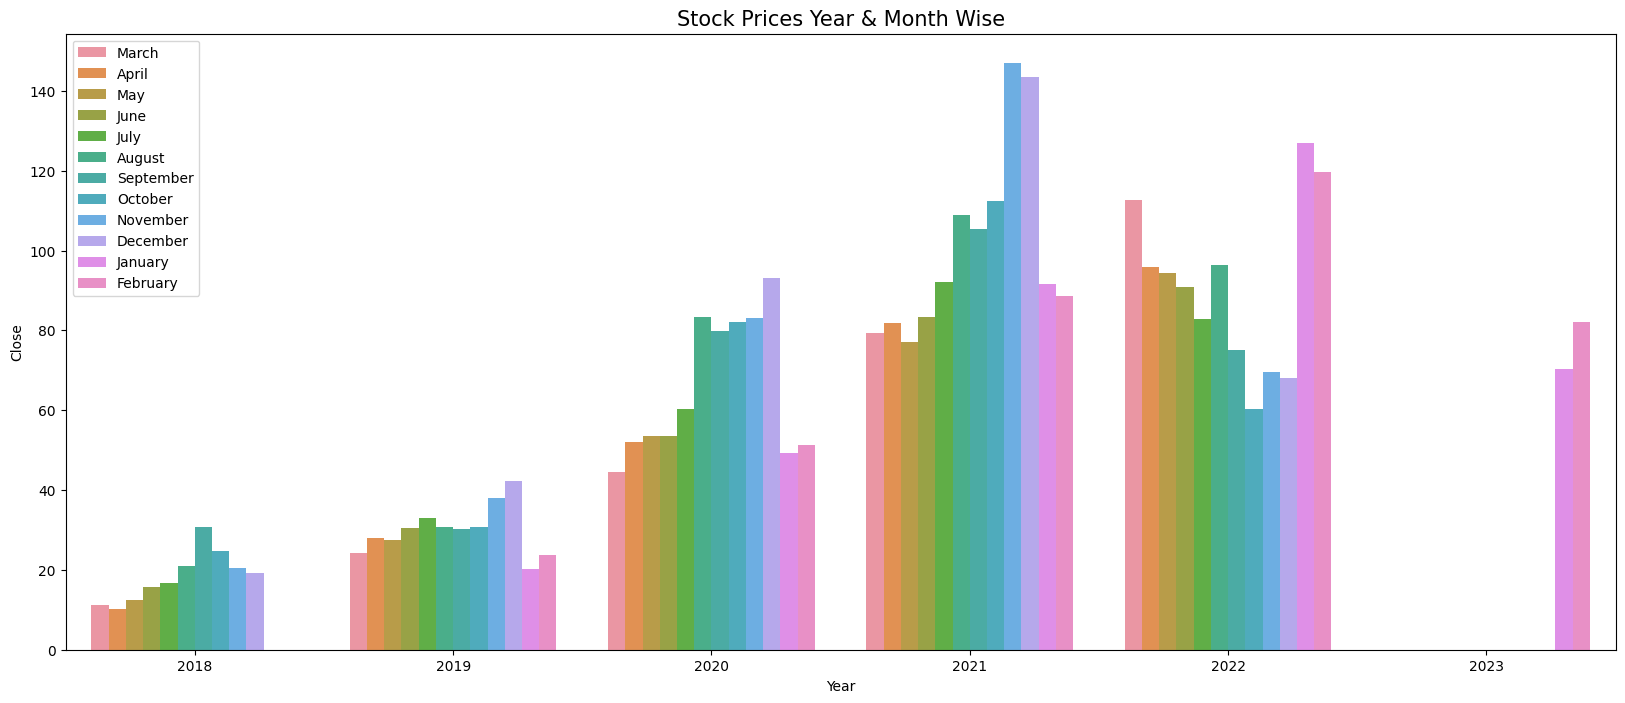

In [81]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

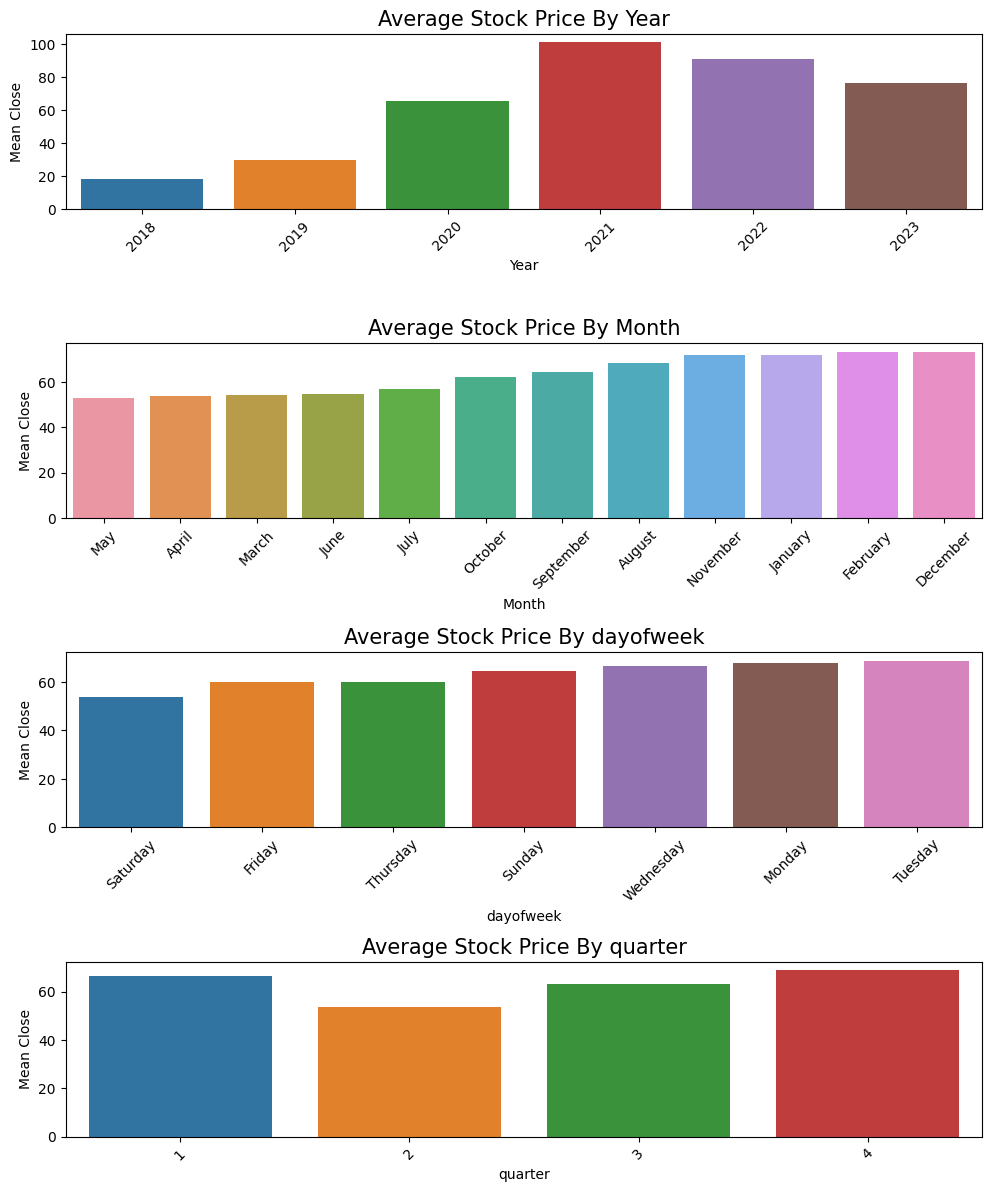

In [82]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [83]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

,Close,Volume,30MA,50MA,EMA_0.3
2018-03-01,11.90,63207400,NaN,NaN,11.90
2018-03-02,11.81,58123500,NaN,NaN,11.87
2018-03-05,11.91,43734800,NaN,NaN,11.88
2018-03-06,11.76,46751200,NaN,NaN,11.85
2018-03-07,12.24,127603200,NaN,NaN,11.96
...,...,...,...,...,...
2023-02-22,76.61,50286800,77.58,72.85,79.13
2023-02-23,79.75,76391300,77.97,73.07,79.31
2023-02-24,78.09,46700000,78.27,73.22,78.95
2023-02-27,78.77,45617300,78.53,73.36,78.89


### Retrieve from FRED Database (US Economics and market data)

In [84]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,2677.67,8135.78,2.81
2018-03-02,2691.25,8117.68,2.86
2018-03-05,2720.94,8206.39,2.88
2018-03-06,2728.12,8213.39,2.88
2018-03-07,2726.80,8183.38,2.89
...,...,...,...
2023-02-23,4012.32,11180.26,3.88
2023-02-24,3970.04,11095.39,3.95
2023-02-27,3982.24,11141.21,3.92
2023-02-28,3970.15,11048.13,3.92


In [85]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,11.90,63207400.00,NaN,NaN,11.90,2677.67,8135.78,2.81
2018-03-02,11.81,58123500.00,NaN,NaN,11.87,2691.25,8117.68,2.86
2018-03-05,11.91,43734800.00,NaN,NaN,11.88,2720.94,8206.39,2.88
2018-03-06,11.76,46751200.00,NaN,NaN,11.85,2728.12,8213.39,2.88
2018-03-07,12.24,127603200.00,NaN,NaN,11.96,2726.80,8183.38,2.89
...,...,...,...,...,...,...,...,...
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92
2023-02-28,78.58,44220100.00,78.79,73.56,78.80,3970.15,11048.13,3.92


## TA-Lib Technical Indicators

In [86]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-03-01,11.90,63207400.00,NaN,NaN,11.90,2677.67,8135.78,2.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63207400.00
2018-03-02,11.81,58123500.00,NaN,NaN,11.87,2691.25,8117.68,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5083900.00
2018-03-05,11.91,43734800.00,NaN,NaN,11.88,2720.94,8206.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48818700.00
2018-03-06,11.76,46751200.00,NaN,NaN,11.85,2728.12,8213.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2067500.00
2018-03-07,12.24,127603200.00,NaN,NaN,11.96,2726.80,8183.38,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129670700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88,52.36,1.60,2.74,-1.14,90.13,81.11,72.08,20.58,11.26,22.65,-21072872.15,2958189800.00
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95,49.43,1.32,2.45,-1.14,89.98,81.25,72.53,31.81,20.02,21.62,-17690759.74,2911489800.00
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92,50.65,1.13,2.19,-1.06,89.81,81.42,73.03,45.69,32.70,20.99,-24831798.14,2957107100.00
2023-02-28,78.58,44220100.00,78.79,73.56,78.80,3970.15,11048.13,3.92,50.28,0.96,1.94,-0.98,89.18,81.73,74.27,43.61,40.37,20.04,-27564785.66,2912887000.00


In [87]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1259 non-null   float64
 1   Volume                 1259 non-null   float64
 2   30MA                   1230 non-null   float64
 3   50MA                   1210 non-null   float64
 4   EMA_0.3                1259 non-null   float64
 5   S&P500                 1259 non-null   float64
 6   DowJones               1259 non-null   float64
 7   10Y_Treasury_Rate      1259 non-null   float64
 8   RSI                    1244 non-null   float64
 9   MACD                   1225 non-null   float64
 10  MACD_Signal            1225 non-null   float64
 11  MACD_Histogram         1225 non-null   float64
 12  Upper_Bollinger_Band   1239 non-null   float64
 13  Middle_Bollinger_Band  1239 non-null   float64
 14  Lower_Bollinger_Band   1239 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [88]:
filtered_data = combined_data[49:-1]
filtered_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-05-10,12.13,49744500.00,10.45,10.79,11.69,2723.07,8253.22,2.97,68.78,0.32,0.11,0.21,12.18,10.77,9.37,95.11,93.84,24.61,49388809.57,103761500.00
2018-05-11,11.95,43863700.00,10.51,10.80,11.77,2727.72,8297.16,2.97,65.11,0.35,0.15,0.19,12.31,10.87,9.44,89.15,92.45,24.70,57440670.30,59897800.00
2018-05-14,12.23,50263800.00,10.60,10.80,11.91,2730.13,8294.47,3.00,67.97,0.39,0.20,0.19,12.48,10.98,9.48,85.50,89.92,25.35,54872998.47,110161600.00
2018-05-15,12.45,44183200.00,10.70,10.81,12.07,2711.45,8236.00,3.08,70.05,0.44,0.25,0.19,12.69,11.08,9.46,86.40,87.02,26.11,61955183.52,154344800.00
2018-05-16,12.82,73364000.00,10.80,10.84,12.29,2722.46,8256.76,3.09,73.21,0.50,0.30,0.20,12.95,11.20,9.45,90.98,87.63,27.53,61813828.40,227708800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,76.61,50286800.00,77.58,72.85,79.13,3991.05,11134.50,3.93,46.82,1.78,3.02,-1.25,90.28,80.87,71.45,7.67,14.32,23.43,-16305349.27,2881798500.00
2023-02-23,79.75,76391300.00,77.97,73.07,79.31,4012.32,11180.26,3.88,52.36,1.60,2.74,-1.14,90.13,81.11,72.08,20.58,11.26,22.65,-21072872.15,2958189800.00
2023-02-24,78.09,46700000.00,78.27,73.22,78.95,3970.04,11095.39,3.95,49.43,1.32,2.45,-1.14,89.98,81.25,72.53,31.81,20.02,21.62,-17690759.74,2911489800.00
2023-02-27,78.77,45617300.00,78.53,73.36,78.89,3982.24,11141.21,3.92,50.65,1.13,2.19,-1.06,89.81,81.42,73.03,45.69,32.70,20.99,-24831798.14,2957107100.00


In [89]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1209 entries, 2018-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1209 non-null   float64
 1   Volume                 1209 non-null   float64
 2   30MA                   1209 non-null   float64
 3   50MA                   1209 non-null   float64
 4   EMA_0.3                1209 non-null   float64
 5   S&P500                 1209 non-null   float64
 6   DowJones               1209 non-null   float64
 7   10Y_Treasury_Rate      1209 non-null   float64
 8   RSI                    1209 non-null   float64
 9   MACD                   1209 non-null   float64
 10  MACD_Signal            1209 non-null   float64
 11  MACD_Histogram         1209 non-null   float64
 12  Upper_Bollinger_Band   1209 non-null   float64
 13  Middle_Bollinger_Band  1209 non-null   float64
 14  Lower_Bollinger_Band   1209 non-null  

In [90]:
filtered_data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Close,1209.00000,65.11130,34.93211,11.95000,30.72000,67.94000,89.05000,161.91000
Volume,1209.00000,71325312.07610,35597659.85631,16705900.00000,45400000.00000,62002700.00000,87780600.00000,325058400.00000
30MA,1209.00000,64.27594,34.96801,10.44667,30.01867,67.50333,89.54333,147.24267
50MA,1209.00000,63.75716,35.03418,10.79460,30.24200,66.54680,88.91440,144.69900
EMA_0.3,1209.00000,64.98141,34.89015,11.68706,30.66584,67.34430,89.21272,156.85878
S&P500,1209.00000,3522.61630,656.15232,2237.40000,2900.51000,3419.45000,4115.77000,4796.56000
DowJones,1209.00000,9833.69748,1397.26438,6100.31000,8625.97000,9573.56000,11284.87000,12360.33000
10Y_Treasury_Rate,1209.00000,2.06360,0.94989,0.52000,1.37000,1.84000,2.87000,4.25000
RSI,1209.00000,54.15065,12.52208,23.88305,45.01709,53.38946,62.24358,88.04435
MACD,1209.00000,0.38870,2.66019,-9.13774,-0.64480,0.46435,1.50387,10.38179


<AxesSubplot:>

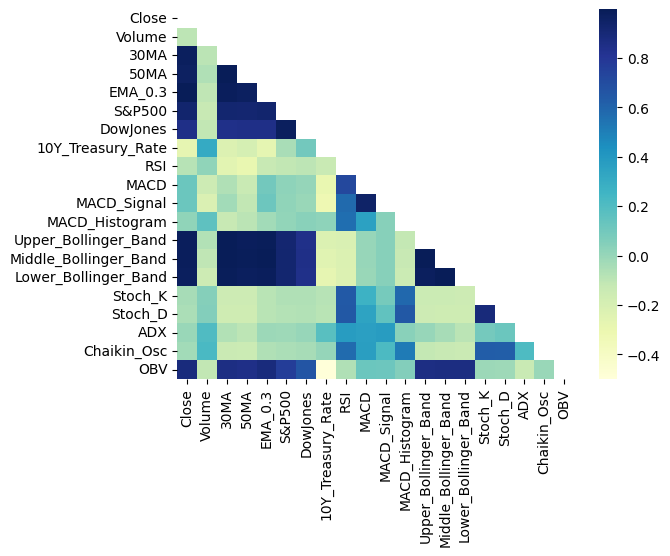

In [91]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(1209, 19)
(1209, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [93]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.45, 0.22, 0.11, 0.08, 0.05, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(846, 19)
(846, 1)
(363, 19)
(363, 1)


In [95]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

1.9767110169082314

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [96]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:21<00:00,  1.92it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RidgeCV,0.99,0.99,1.95,0.02
BayesianRidge,0.99,0.99,1.96,0.01
LassoLarsIC,0.99,0.99,1.98,0.02
LinearRegression,0.99,0.99,1.98,0.01
RANSACRegressor,0.99,0.99,1.98,0.01
TransformedTargetRegressor,0.99,0.99,1.98,0.02
Ridge,0.99,0.99,2.00,0.01
LassoLarsCV,0.99,0.99,2.03,0.06
HuberRegressor,0.99,0.99,2.06,0.08


# Regression & ensemble learning

In [97]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [98]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [99]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [100]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 1.287084 0.365580 0.748722 1.976711
LASSO: 12.982856 11.489751 2.038783 4.303025
RIDGE: 1.546687 0.755986 0.802404 2.016914
EN: 13.901504 7.991373 4.005182 10.786605
KNR: 15.420631 9.461671 1.274562 21.415260
CART: 7.514564 3.745225 0.000000 14.938109
SVR: 17.732300 12.095129 6.431160 40.803786
RFR: 8.752757 4.756881 0.402186 15.121936
BR: 9.833681 6.531491 0.569172 14.677712
ABR: 7.927306 3.853857 1.859698 14.990212
GBR: 8.063833 4.337689 0.465742 15.025879
ETR: 8.590426 4.776634 0.000000 14.788065
XGB: 6.410843 2.619155 0.036189 15.063486
LGBM: 9.851518 7.375565 0.343388 15.221763
CBR: 13.144687 9.628381 0.214589 18.238278
MLP: 25.858871 15.593175 5.998864 32.107684


In [101]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

,CV_mean,CV_std,Train_RMSE,Test_RMSE
Names,,,,
LR,1.29,0.37,0.75,1.98
LASSO,12.98,11.49,2.04,4.30
RIDGE,1.55,0.76,0.80,2.02
EN,13.90,7.99,4.01,10.79
KNR,15.42,9.46,1.27,21.42
CART,7.51,3.75,0.00,14.94
SVR,17.73,12.10,6.43,40.80
RFR,8.75,4.76,0.40,15.12
BR,9.83,6.53,0.57,14.68


#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

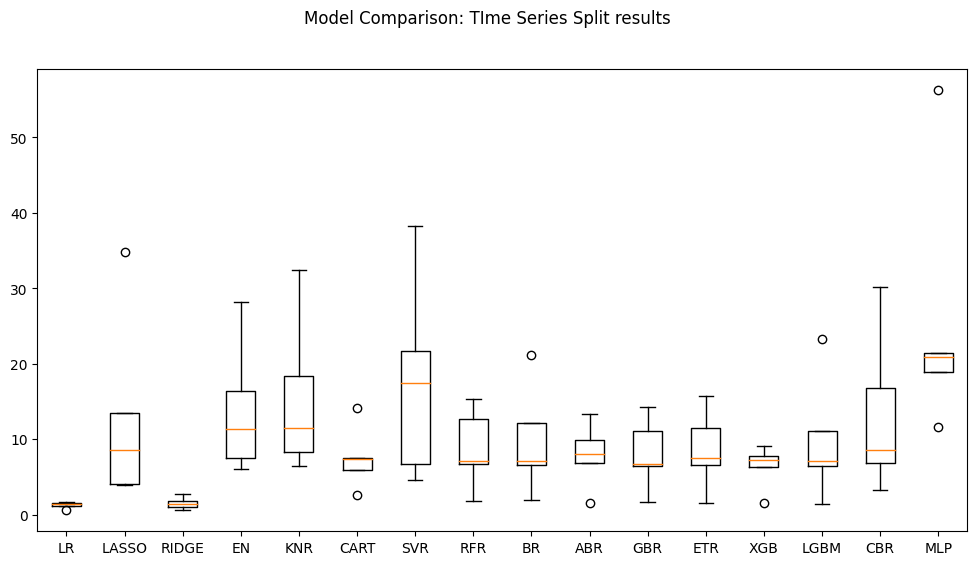

In [102]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [103]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

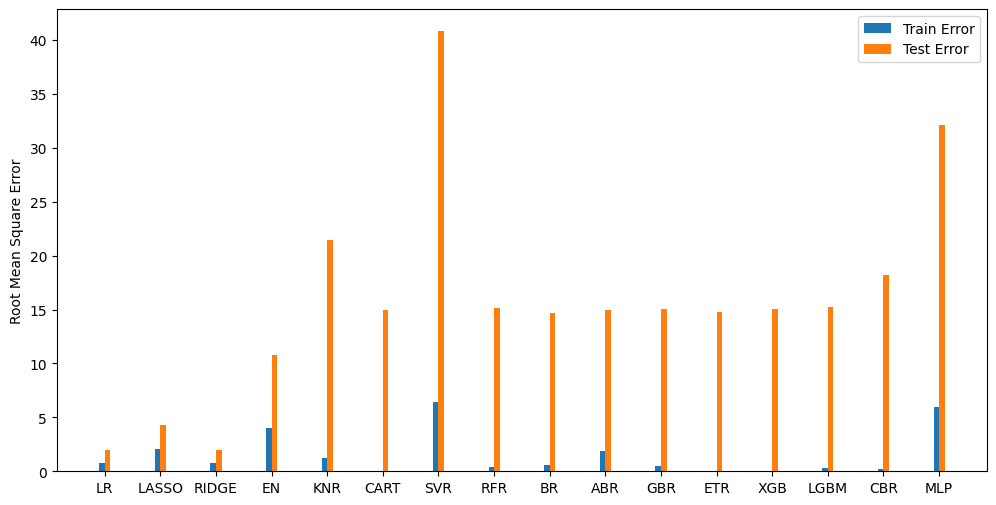

In [104]:
plot_models_RMSE()

# ARIMA

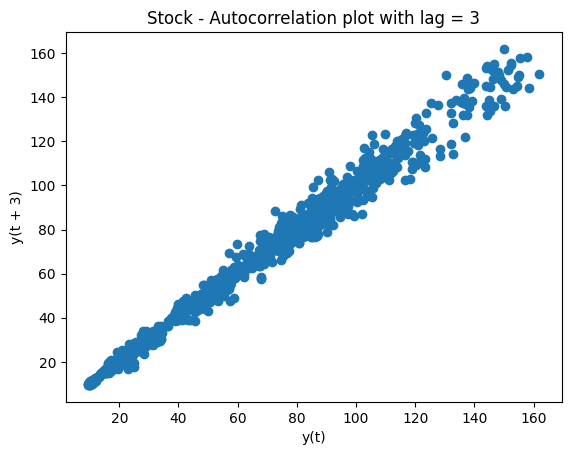

In [105]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [106]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [107]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-1.6509570090709613, 0.45654136397786504, 1, 1207, {'1%': -3.43577938005948, '5%': -2.863937543790164, '10%': -2.568046493171221}, 5570.02063536289) 

ADF Statistic: -1.6509570090709613
n_lags: 0.45654136397786504
p-value: 0.45654136397786504
Critial Values:
   1%, -3.43577938005948
Critial Values:
   5%, -2.863937543790164
Critial Values:
   10%, -2.568046493171221
	1%: -3.436
	5%: -2.864
	10%: -2.568

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

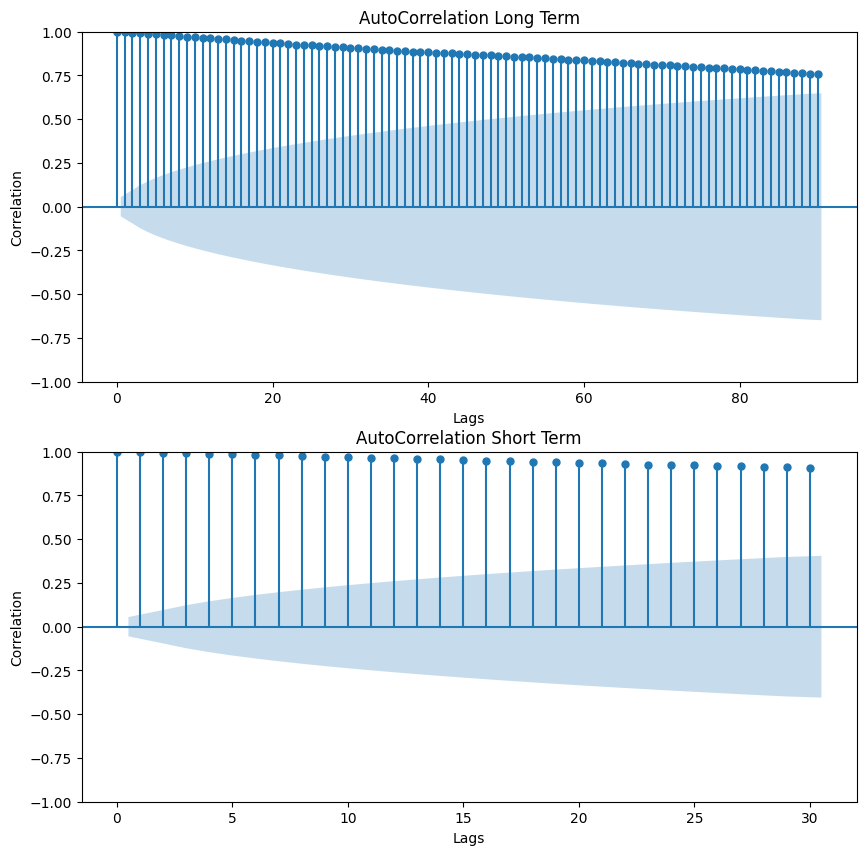

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

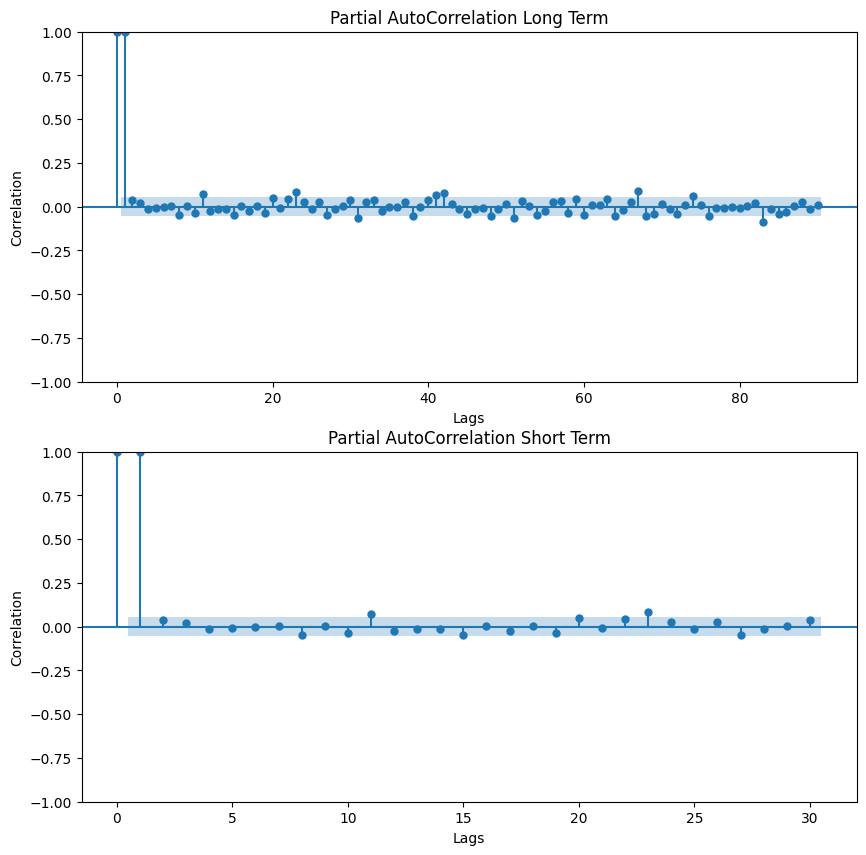

In [109]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

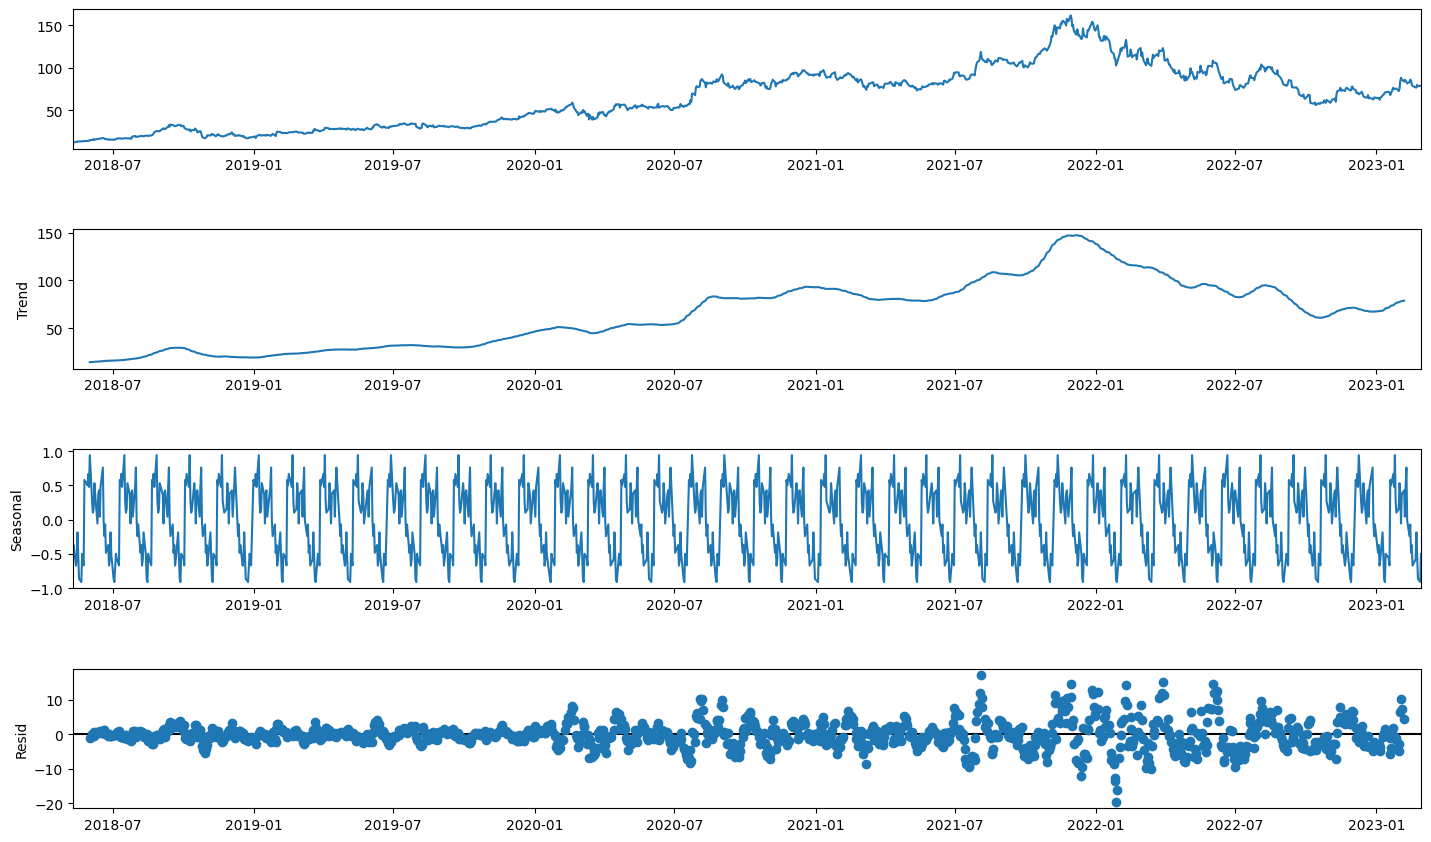

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [111]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [112]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 28.48222 | Test RMSE: 52.96066
Model (0, 0, 1) | Train RMSE: 15.00254 | Test RMSE: 65.39925
Model (0, 0, 2) | Train RMSE: 9.21455 | Test RMSE: 71.02035
Model (0, 1, 0) | Train RMSE: 1.79828 | Test RMSE: 78.94282
Model (0, 1, 1) | Train RMSE: 1.79427 | Test RMSE: 78.94674
Model (0, 1, 2) | Train RMSE: 1.78897 | Test RMSE: 78.94213
Model (0, 2, 0) | Train RMSE: 2.60493 | Test RMSE: 78.87289
Model (0, 2, 1) | Train RMSE: 1.80988 | Test RMSE: 78.83867
Model (0, 2, 2) | Train RMSE: 1.80539 | Test RMSE: 78.83629
Model (1, 0, 0) | Train RMSE: 2.20756 | Test RMSE: 78.78057
Model (1, 0, 1) | Train RMSE: 2.20435 | Test RMSE: 78.79024
Model (1, 0, 2) | Train RMSE: 2.19997 | Test RMSE: 78.77970
Model (1, 1, 0) | Train RMSE: 1.79362 | Test RMSE: 78.94708
Model (1, 1, 1) | Train RMSE: 1.78872 | Test RMSE: 78.94602
Model (1, 1, 2) | Train RMSE: 1.78683 | Test RMSE: 78.94320
Model (1, 2, 0) | Train RMSE: 2.14970 | Test RMSE: 78.87108
Model (1, 2, 1) | Train RMSE: 1.80471 

In [114]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 28.48222 | Test RMSE: 52.96066
Model (0, 0, 1) | Train RMSE: 15.00254 | Test RMSE: 52.90048
Model (0, 0, 2) | Train RMSE: 9.21455 | Test RMSE: 52.87386
Model (0, 1, 0) | Train RMSE: 1.79828 | Test RMSE: 27.10045
Model (0, 1, 1) | Train RMSE: 1.79427 | Test RMSE: 27.13660
Model (0, 1, 2) | Train RMSE: 1.78897 | Test RMSE: 27.10236
Model (0, 2, 0) | Train RMSE: 2.60493 | Test RMSE: 475.30247
Model (0, 2, 1) | Train RMSE: 1.80988 | Test RMSE: 44.85425
Model (0, 2, 2) | Train RMSE: 1.80539 | Test RMSE: 44.98815
Model (1, 0, 0) | Train RMSE: 2.20756 | Test RMSE: 22.68356
Model (1, 0, 1) | Train RMSE: 2.20435 | Test RMSE: 23.43760
Model (1, 0, 2) | Train RMSE: 2.19997 | Test RMSE: 22.63601
Model (1, 1, 0) | Train RMSE: 1.79362 | Test RMSE: 27.14015
Model (1, 1, 1) | Train RMSE: 1.78872 | Test RMSE: 27.13664
Model (1, 1, 2) | Train RMSE: 1.78683 | Test RMSE: 27.11439
Model (1, 2, 0) | Train RMSE: 2.14970 | Test RMSE: 248.70638
Model (1, 2, 1) | Train RMSE: 1.8047

In [115]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

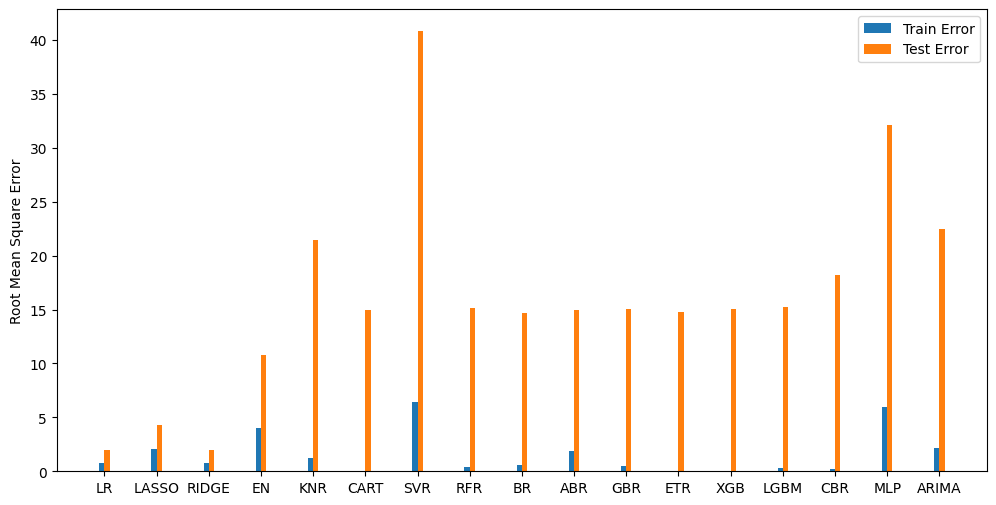

In [116]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [117]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  846
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1671.310
Date:                Tue, 28 Mar 2023   AIC                           3354.619
Time:                        18:13:13   BIC                           3383.062
Sample:                             0   HQIC                          3365.517
                                - 846                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3073     31.152      1.647      0.100      -9.749     112.363
ar.L1          0.5241      0.196      2.680      0.007       0.141       0.907
ar.L2          0.4743      0.196      2.426      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3344.781, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3341.595, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3342.283, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3346.039, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3338.614, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3339.118, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3339.435, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3338.836, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3341.099, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3339.858, Time=0.07 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.564 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  846
Model:               SARIMAX(2, 1, 0)   Log Likelihood        

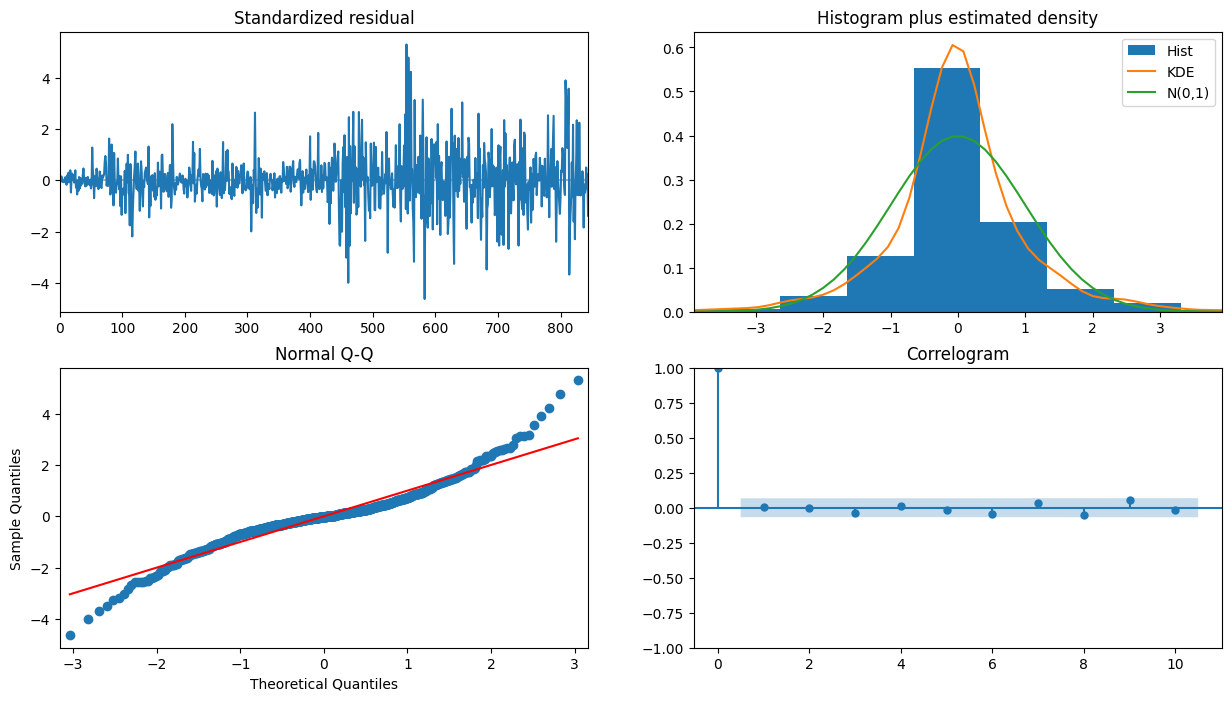

In [118]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [119]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(880, 1)
(378, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [121]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (869, 10)
trainY.shape =  (869,)
testX.shape =  (367, 10)
testY.shape =  (367,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [122]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([869, 10, 1])
trainY.shape =  torch.Size([869, 1])
testX.shape =  torch.Size([367, 10, 1])
testY.shape =  torch.Size([367, 1])


In [123]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [124]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [125]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [126]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.1299
Epoch: 20/100, Loss: 0.0744
Epoch: 30/100, Loss: 0.0552
Epoch: 40/100, Loss: 0.0440
Epoch: 50/100, Loss: 0.0370
Epoch: 60/100, Loss: 0.0320
Epoch: 70/100, Loss: 0.0297
Epoch: 80/100, Loss: 0.0311
Epoch: 90/100, Loss: 0.0277
Epoch: 100/100, Loss: 0.0285


In [127]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

      0
0 57.81
1 57.82
2 57.78
3 57.47
4 57.62
      0
0 57.22
1 58.75
2 56.10
3 57.83
4 57.15

LSTM Train RMSE: 3.0190127


#### Plotting the error loss of all epochs

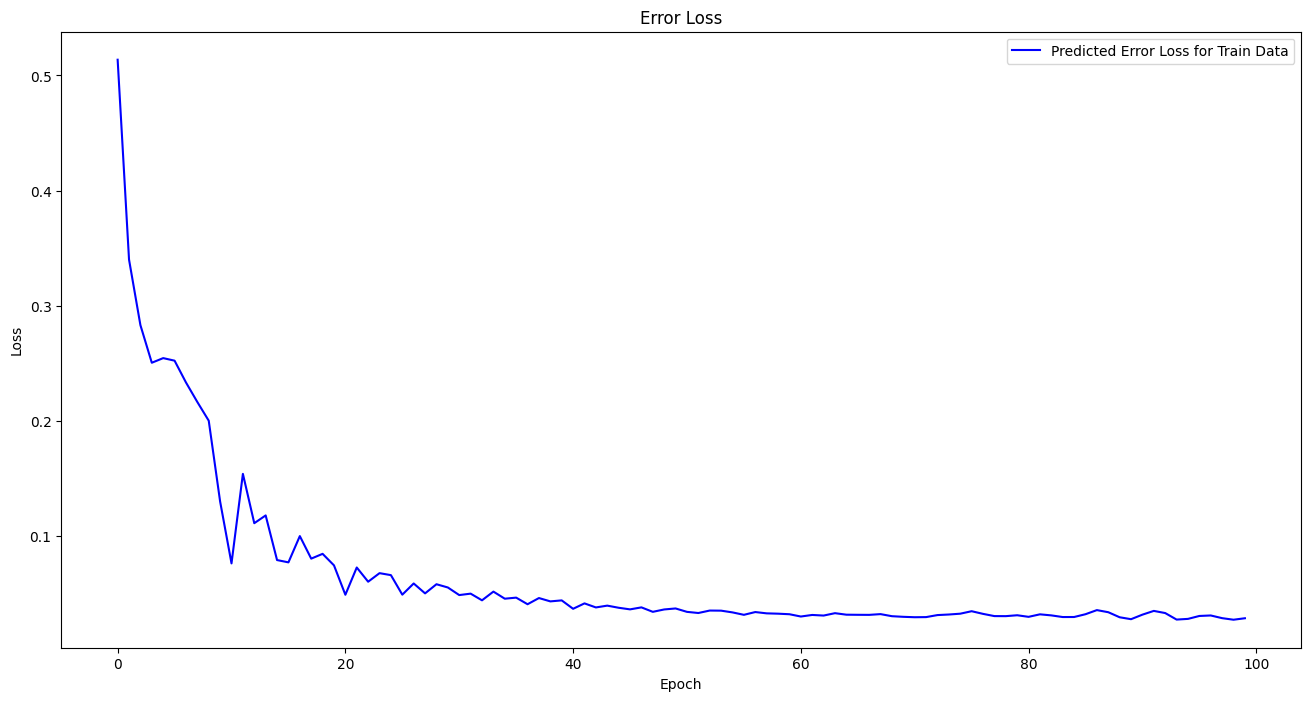

In [128]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

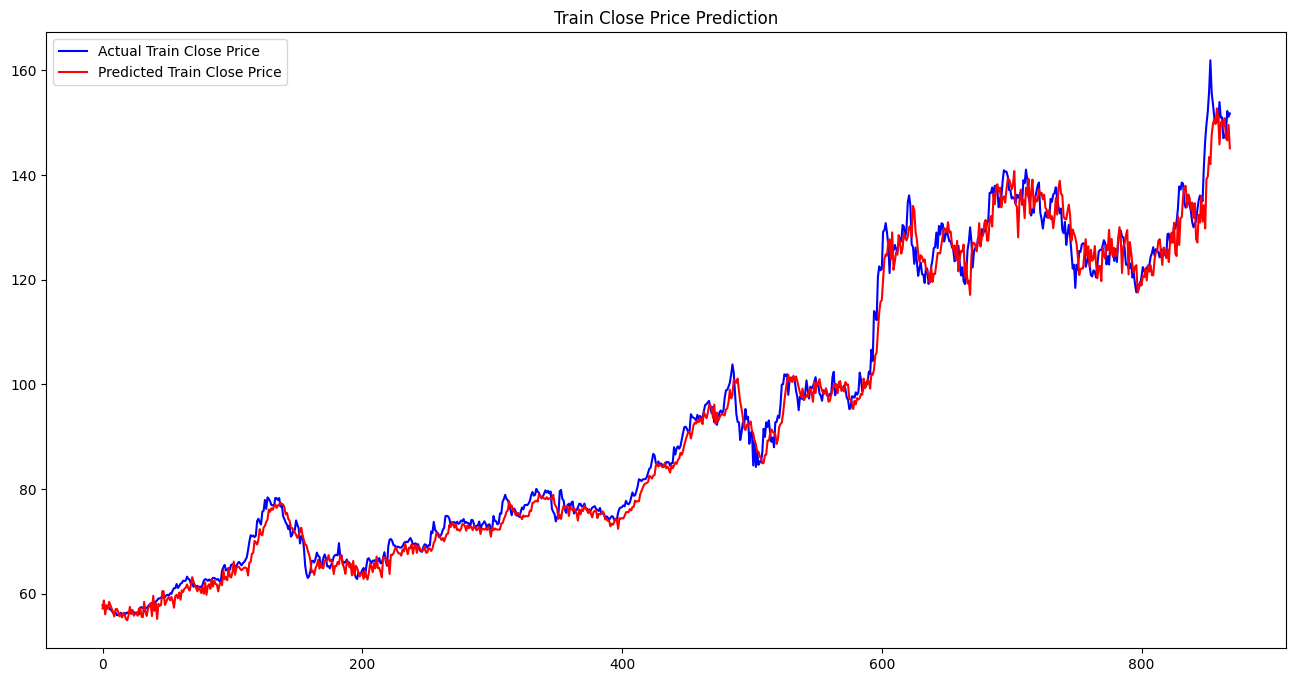

In [129]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [130]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

       0
0 104.80
1 105.73
2 105.60
3 106.22
4 103.88
       0
0 109.43
1 108.55
2 107.98
3 107.67
4 107.62

3.0190127


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [131]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

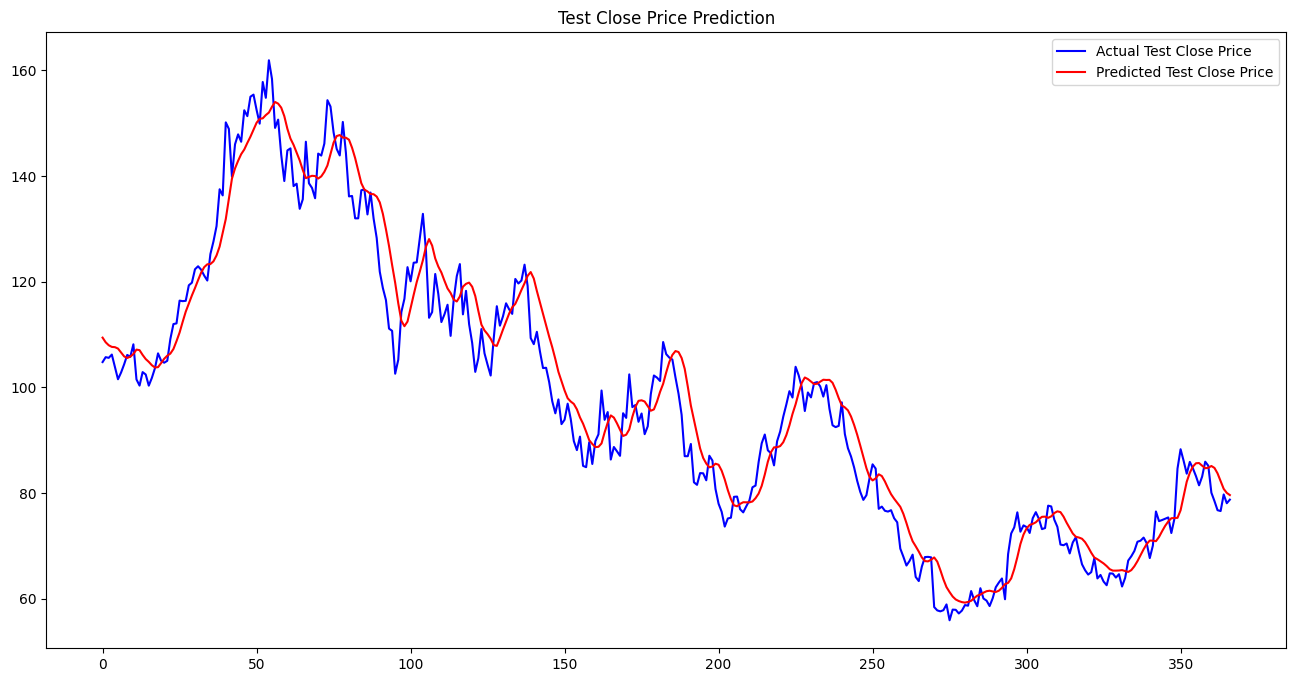

In [132]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [133]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

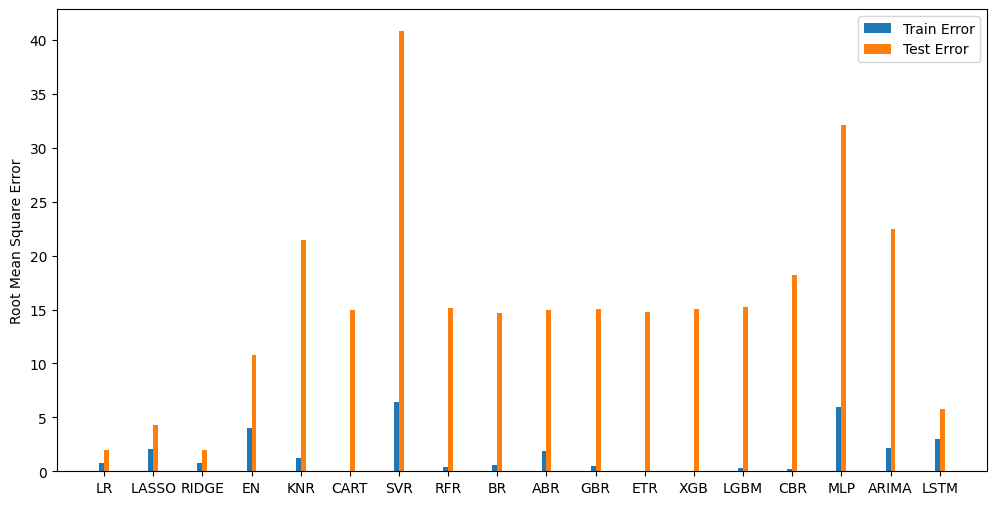

In [134]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.